In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

In [60]:
df_in=pd.read_csv('/content/Iris (1).csv')
y = df_in[["Species"]]
X = df_in[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
print ("Number of Observations :",df_in.shape[0])
print ("Number of Features/Columns  :",df_in.shape[1])

Number of Observations : 150
Number of Features/Columns  : 6


In [62]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [63]:
df_in.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [64]:
df_in.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [65]:
X_std = StandardScaler().fit_transform(X)
X__std = pd.DataFrame(X_std)
X__std

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [66]:
mean_vec =np.mean(X_std,axis=0)
mean_vec

array([-4.7370e-16, -6.6317e-16,  3.3159e-16, -2.8422e-16])

In [67]:
cov_mat =(X_std-mean_vec).T.dot((X_std - mean_vec)/X_std.shape[0]-1)
cov_mat

array([[ 1.    , -0.1094,  0.8718,  0.818 ],
       [-0.1094,  1.    , -0.4205, -0.3565],
       [ 0.8718, -0.4205,  1.    ,  0.9628],
       [ 0.818 , -0.3565,  0.9628,  1.    ]])

In [68]:
cov_mat=np.cov(X_std.T)
eig_vals,eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)
print("\n")
print(eig_vecs)

[2.9304 0.9274 0.1483 0.0207]


[[ 0.5224 -0.3723 -0.721   0.262 ]
 [-0.2634 -0.9256  0.242  -0.1241]
 [ 0.5813 -0.0211  0.1409 -0.8012]
 [ 0.5656 -0.0654  0.6338  0.5235]]


In [69]:
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:i]) for i in range(len(eig_vals))]
print("in decreasing order\n")
for i in eig_pairs:
  print(i[0])

in decreasing order

2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])
principalDf

,pca1,pca2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [71]:
finalDf = pd.concat([principalDf, df_in[['Species']]], axis = 1)
finalDf

,pca1,pca2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


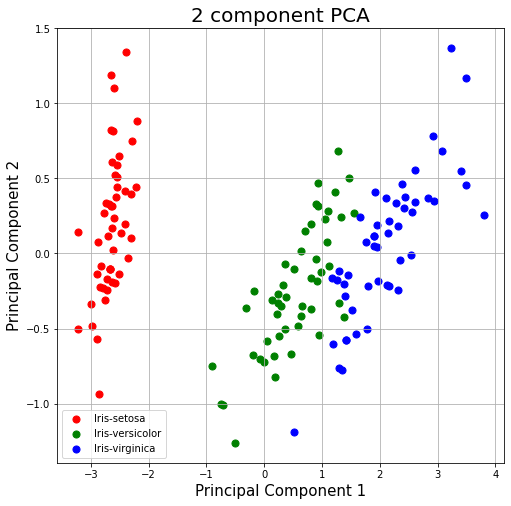

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1'], finalDf.loc[indicesToKeep, 'pca2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [73]:

print(pca.explained_variance_ratio_)

[0.9246 0.053 ]


In [74]:
print(pca.explained_variance_)

[4.2248 0.2422]


In [75]:
print(pca.components_)

[[ 0.3616 -0.0823  0.8566  0.3588]
 [ 0.6565  0.7297 -0.1758 -0.0747]]


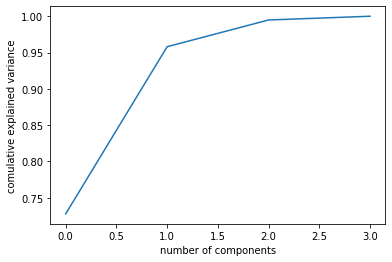

In [76]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("comulative explained variance")
plt.show()


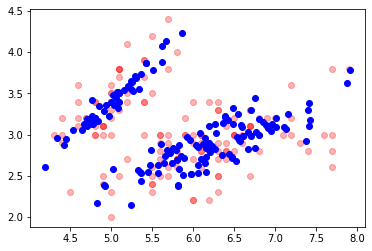

In [77]:
pca = PCA(n_components=2)
X= np.array(X)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3,c='r')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=1,c='b')
plt.axis('equal');

# **LDA**

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
np.set_printoptions(precision=4)
class_le = LabelEncoder()
y = class_le.fit_transform(df_in['Species'].values)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_std, y)

In [80]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LDA1","LDA2","class"]
data.head()

,LDA1,LDA2,class
0,8.084953,0.328454,0
1,7.147163,-0.755473,0
2,7.511378,-0.238078,0
3,6.837676,-0.642885,0
4,8.157814,0.540639,0


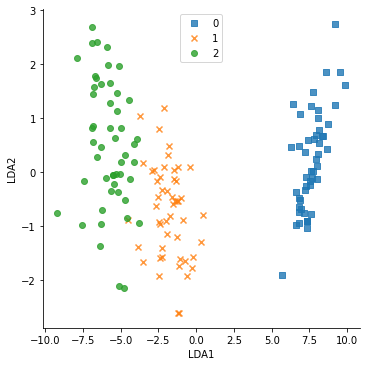

In [81]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LDA1", y="LDA2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()

In [82]:
print("Training data shape",X_train_lda.shape)

Training data shape (150, 2)


In [83]:
#Explaned variance ratio
lda.explained_variance_ratio_ * 100

array([99.1472,  0.8528])

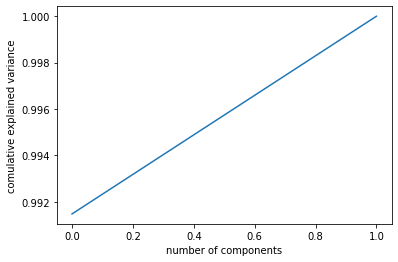

In [84]:
lda = LDA().fit(X,y)
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("comulative explained variance")
plt.show()

In [85]:
Xtrain,Xtest,Ytrain, Ytest=train_test_split(X,y,test_size=0.2)
sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [86]:
gnb=GaussianNB().fit(Xtrain,Ytrain)
Ypredg=gnb.predict(Xtest)
score=cross_val_score(gnb,Xtrain,Ytrain,cv=sf)
print("The accuracy=" ,score.mean())
print("The Variance=" ,score.var())
print("The std deviation=" ,score.std())


The accuracy= 0.9583333333333334
The Variance= 0.0013888888888888902
The std deviation= 0.03726779962499651
